In [4]:
import numpy as np
import matplotlib.pyplot as plt

class AnomalyDetector:
    def __init__(self, threshold_prob=0.01):
        self.threshold_prob = threshold_prob  # Probability below which it's anomaly
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X)
        self.std = np.std(X)

    def gaussian_pdf(self, x):
        # Compute the normal distribution PDF manually
        coeff = 1 / (self.std * np.sqrt(2 * np.pi))
        exponent = -((x - self.mean) ** 2) / (2 * self.std ** 2)
        return coeff * np.exp(exponent)

    def predict(self, X):
        probs = np.array([self.gaussian_pdf(x) for x in X])
        anomalies = probs < self.threshold_prob
        return anomalies, probs

    def plot(self, X, anomalies, probs):
        plt.figure(figsize=(10,6))
        plt.title("Anomaly Detection")
        plt.xlabel("Data points")
        plt.ylabel("Value")

        plt.scatter(range(len(X)), X, label='Data points')
        plt.scatter(np.where(anomalies)[0], X[anomalies], color='red', label='Anomalies', s=100, edgecolors='black')

        plt.twinx()
        plt.plot(range(len(X)), probs, color='green', label='Probability')
        
        plt.ylabel("Probability")

        plt.legend(loc='upper right')
        plt.show()


Anomalies detected at indices: [34 38 81 96]
Anomaly values: [15. 90. 20. 80.]


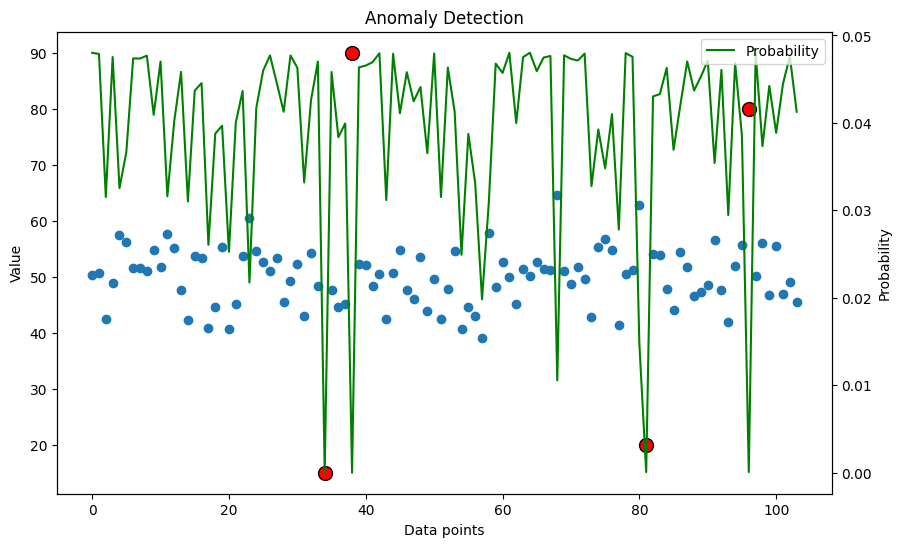

In [5]:
# Normal data around 50 with small noise
normal_data = np.random.normal(50, 5, 100)
# Some anomalies far away
anomalies = np.array([20, 80, 90, 15])
data = np.concatenate([normal_data, anomalies])
np.random.shuffle(data)

detector = AnomalyDetector(threshold_prob=0.01)
detector.fit(data)
anomalies_flag, probabilities = detector.predict(data)

print("Anomalies detected at indices:", np.where(anomalies_flag)[0])
print("Anomaly values:", data[anomalies_flag])

detector.plot(data, anomalies_flag, probabilities)
